In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix


In [3]:
le = preprocessing.LabelEncoder()

In [4]:
df_views=pd.read_csv('/content/drive/MyDrive/bup/df_preprocess_final_process.csv')

In [5]:
feature_cols = ['orig_bytes', 'resp_bytes','missed_bytes','orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes','continent',
       'country','proto_0','proto_1','conn_state_0','conn_state_1','conn_state_2']
X = df_views[feature_cols] # Features
y = df_views.label

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)


KNeighborsClassifier()

In [8]:
y_pred=knn.predict(X_test)

In [9]:
knn.score(X_test,y_test)


0.9594339622641509

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[985,  15],
       [ 28,  32]])

In [11]:
len(y_test)

1060

In [12]:
unique, counts = np.unique(y_pred, return_counts=True)

In [13]:
print(unique,counts)

[0 1] [1013   47]


In [14]:
unique, counts = np.unique(y_test, return_counts=True)

In [15]:
print(unique,counts)

[0 1] [1000   60]


In [16]:
!pip install https://github.com/adebayoj/fairml/archive/master.zip

     \ 7.5 MB 1.7 MB/s
  Created wheel for fairml: filename=fairml-0.1.1.5-py3-none-any.whl size=9452 sha256=54e5845f4a5c3877617b45f45e3f032ca3182232ce2f2ef557523ecc501234cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-otf2s38g/wheels/42/bd/5d/2499f7ddb98ec90205117f41bb0cd7fbae97922bacd6a4fe24
Successfully built fairml


In [17]:
from fairml import audit_model
from fairml import plot_dependencies
from sklearn.linear_model import LogisticRegression

In [18]:
propublica_data = X

In [19]:
propublica_data

,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,continent,country,proto_0,proto_1,conn_state_0,conn_state_1,conn_state_2
0,0,0,0,1,56,0,0,1,53,1,0,1,0,0
1,0,0,0,1,68,0,0,2,24,1,0,1,0,0
2,0,0,0,1,68,0,0,1,20,1,0,1,0,0
3,120,0,0,2,176,0,0,1,96,1,0,1,0,0
4,0,0,0,1,68,0,0,3,113,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3527,0,0,0,1,68,0,0,1,96,1,0,1,0,0
3528,0,0,0,1,68,0,0,1,53,1,0,1,0,0
3529,0,0,0,1,56,0,0,2,112,1,0,1,0,0
3530,0,0,0,1,56,0,0,3,113,1,0,1,0,0


In [20]:
compas_rating = y


In [21]:
clf = LogisticRegression(penalty='l2', C=0.01)
clf.fit(propublica_data, compas_rating)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=0.01)

In [22]:
total, _ = audit_model(clf.predict, propublica_data)

# print feature importance
print(total)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X 

Feature: orig_bytes,	 Importance: 0.007927519818799546
Feature: resp_bytes,	 Importance: 0.0
Feature: missed_bytes,	 Importance: 0.010192525481313703
Feature: orig_pkts,	 Importance: 0.00028312570781426955
Feature: orig_ip_bytes,	 Importance: -0.0005662514156285391
Feature: resp_pkts,	 Importance: 0.0
Feature: resp_ip_bytes,	 Importance: 0.0
Feature: continent,	 Importance: -0.5704983012457531
Feature: country,	 Importance: 0.5580407701019252
Feature: proto_0,	 Importance: 0.931766704416761
Feature: proto_1,	 Importance: 0.00594563986409966
Feature: conn_state_0,	 Importance: 0.8640996602491506
Feature: conn_state_1,	 Importance: 0.0
Feature: conn_state_2,	 Importance: 0.00594563986409966


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X 

In [23]:
type(total)

fairml.orthogonal_projection.AuditResult

In [24]:
feature_cols = ['orig_bytes', 'resp_bytes','missed_bytes','orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes','continent',
       'country','proto_0','proto_1','conn_state_0','conn_state_1','conn_state_2','conn_state_3']

In [25]:
imp=[0.007927519818799546,0.0, 0.010192525481313703,0.00028312570781426955,0.00028312570781426955,-0.0005662514156285391,0.0,0.0,-0.5704983012457531,0.5580407701019252,0.931766704416761,0.00594563986409966,0.8640996602491506,0.0,0.00594563986409966]

In [26]:
len(feature_cols)

15

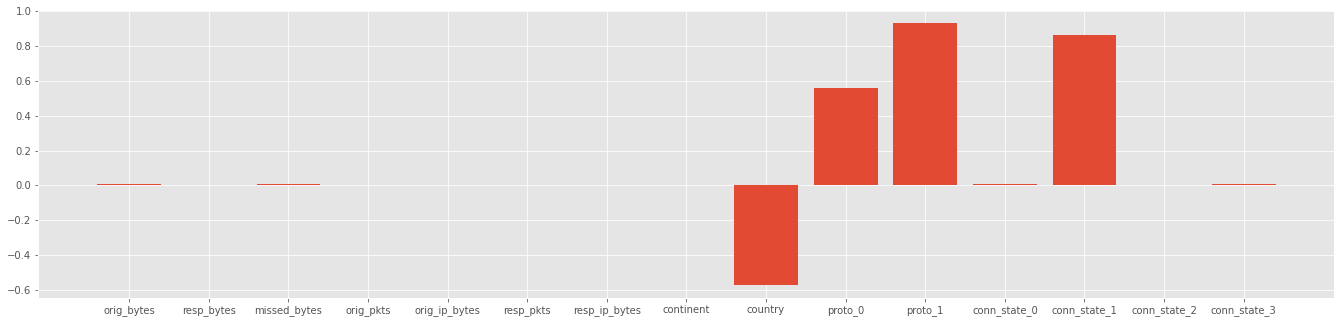

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(feature_cols,imp)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

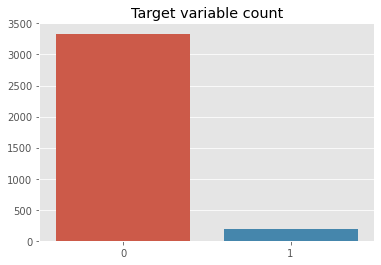

In [28]:
import seaborn as sns
r=y.value_counts().values
sns.barplot([0,1],r)
plt.title('Target variable count')

In [29]:
X1=pd.concat([X,y],axis=1)


benign=X1[X1==0]
malicious=X1[X1.label==1]

# upsample minority
malicious_upsampled = resample(malicious,
                          replace=True, # sample with replacement
                          n_samples=len(benign), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([benign, malicious_upsampled])

# check new class counts
upsampled.label.value_counts()

1.0    3532
0.0    3334
Name: label, dtype: int64

In [30]:

feature_cols = ['orig_bytes', 'resp_bytes','missed_bytes','orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes','continent',
       'country','proto_0','proto_1','conn_state_0','conn_state_1','conn_state_2']
X = X1[feature_cols] # Features
y = X1.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)


array([[985,  28],
       [ 15,  32]])

In [31]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Precision Score',precision_score(y_test, y_pred, average='macro'))
print('Recall Score',recall_score(y_test, y_pred, average='macro'))

Precision Score 0.8266051962781711
Recall Score 0.7591666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


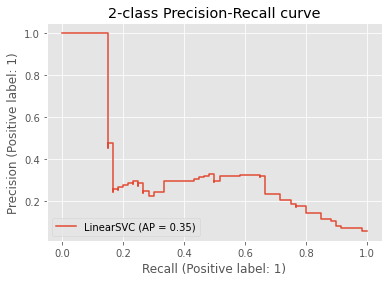

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=12))
classifier.fit(X_train, y_train)

from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Text(0, 0.5, 'count')

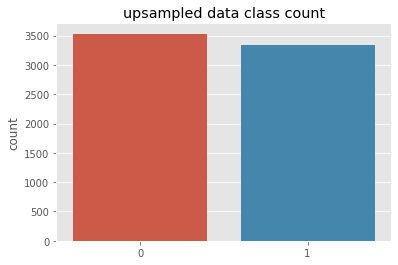

In [33]:
y=upsampled.label.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('upsampled data class count')
plt.ylabel('count')

In [34]:
benign_downsampled = resample(benign,
                                replace = False, # sample without replacement
                                n_samples = len(malicious), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([benign_downsampled, malicious])

# checking counts
downsampled.label.value_counts()

1.0    198
0.0    182
Name: label, dtype: int64

Text(0, 0.5, 'count')

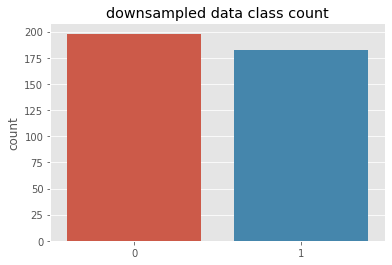

In [35]:
y=downsampled.label.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('downsampled data class count')
plt.ylabel('count')

In [36]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [37]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [38]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=14, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

In [39]:
import tqdm

EPOCHS  = 100
x_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(y_train))).long()
x_test  = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test  = Variable(torch.from_numpy(np.array(y_test))).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(x_train)
    loss = loss_fn(y_pred, Y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(x_test)
        correct = (torch.argmax(y_pred, dim=1) == Y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 118.76it/s]


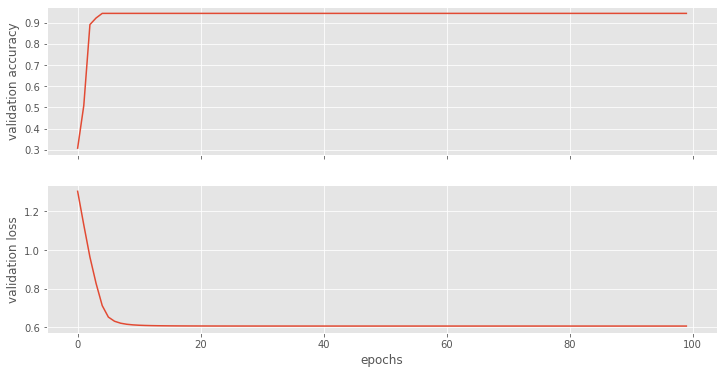

In [40]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

In [41]:
y_pred = model(x_test)

In [42]:
y_prediction = torch.argmax(y_pred, dim=1) 

In [43]:
y_prediction=np.asarray(y_prediction)

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_prediction, y_test)


array([[920,   40],
   [12,    10]])


In [48]:
#Fairness calculations

In [49]:
XU=X1[X1['country']==113]

In [50]:
XG=X1[X1['country']==38]

In [51]:
XC=X1[X1['country']==20]

In [52]:
XK=X1[X1['country']==96]

In [53]:
feature_cols = ['orig_bytes', 'resp_bytes','missed_bytes','orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes','continent',
       'country','proto_0','proto_1','conn_state_0','conn_state_1','conn_state_2']
XUX = XU[feature_cols] # Features
yUX = XU.label

X_train, X_test, y_train, y_test = train_test_split(XUX, yUX, test_size=0.3, random_state=1)
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print('Confusion matrix for Group-A',confusion_matrix(y_pred,y_test))
print('Accuracy Score for Group-A',accuracy_score(y_pred,y_test))

Confusion matrix for Group-A [[213  10]
 [  1  11]]
Accuracy Score for Group-A 0.9531914893617022


In [54]:
feature_cols = ['orig_bytes', 'resp_bytes','missed_bytes','orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes','continent',
       'country','proto_0','proto_1','conn_state_0','conn_state_1','conn_state_2']
XUX = XG[feature_cols] # Features
yUX = XG.label

X_train, X_test, y_train, y_test = train_test_split(XUX, yUX, test_size=0.3, random_state=1)
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print('Confusion matrix for Group-B',confusion_matrix(y_pred,y_test))
print('Accuracy Score for Group-B',accuracy_score(y_pred,y_test))

Confusion matrix for Group-B [[109   2]
 [  0   5]]
Accuracy Score for Group-B 0.9827586206896551


In [55]:
feature_cols = ['orig_bytes', 'resp_bytes','missed_bytes','orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes','continent',
       'country','proto_0','proto_1','conn_state_0','conn_state_1','conn_state_2']
XUX = XC[feature_cols] # Features
yUX = XC.label

X_train, X_test, y_train, y_test = train_test_split(XUX, yUX, test_size=0.3, random_state=1)
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print('Confusion matrix for Group-C',confusion_matrix(y_pred,y_test))
print('Accuracy Score for Group-C',accuracy_score(y_pred,y_test))

Confusion matrix for Group-C [[85  4]
 [ 0  0]]
Accuracy Score for Group-C 0.9550561797752809


In [56]:
feature_cols = ['orig_bytes', 'resp_bytes','missed_bytes','orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes','continent',
       'country','proto_0','proto_1','conn_state_0','conn_state_1','conn_state_2']
XUX = XK[feature_cols] # Features
yUX = XK.label

X_train, X_test, y_train, y_test = train_test_split(XUX, yUX, test_size=0.3, random_state=1)
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print('Confusion matrix for Group-C',confusion_matrix(y_pred,y_test))
print('Accuracy Score for Group-C',accuracy_score(y_pred,y_test))

Confusion matrix for Group-C [[71  3]
 [ 0  0]]
Accuracy Score for Group-C 0.9594594594594594


In [65]:
dicto={}
dicto[0]= 'Afghanistan                 '
dicto[1]= 'Algeria					   '
dicto[2]= 'Angola					   '
dicto[3]= 'Anguilla					   '
dicto[4]= 'Argentina				   '
dicto[5]= 'Armenia					   '
dicto[6]= 'Australia				   '
dicto[7]= 'Austria					   '
dicto[8]= 'Azerbaijan				   '
dicto[9]= 'Bangladesh				   '
dicto[10]= 'Belarus					   '
dicto[11]='Belgium					   '
dicto[12]='Bermuda					   '
dicto[13]='Bolivia					   '
dicto[14]='Brazil					   '
dicto[15]='Bulgaria					   '
dicto[16]='Burkina Faso				   '
dicto[17]='Burundi					   '
dicto[18]='Canada					   '
dicto[19]='Chile					   '
dicto[20]='China					   '
dicto[21]='Colombia					   '
dicto[22]='Congo - Kinshasa			   '
dicto[23]='Costa Rica				   '
dicto[24]='Croatia					   '
dicto[25]='Cyprus					   '
dicto[26]='Czechia					   '
dicto[27]='Côte d’Ivoire			   '
dicto[28]='Denmark					   '
dicto[29]='Dominica					   '
dicto[30]='Ecuador					   '
dicto[31]='Egypt					   '
dicto[32]='Estonia					   '
dicto[33]='Finland					   '
dicto[34]='France					   '
dicto[35]='French Polynesia			   '
dicto[36]='Gambia					   '
dicto[37]='Georgia					   '
dicto[38]='Germany					   '
dicto[39]='Ghana					   '
dicto[40]='Greece					   '
dicto[41]='Guam						   '
dicto[42]='Honduras					   '
dicto[43]='Hong Kong SAR China		   '
dicto[44]='Hungary					   '
dicto[45]='Iceland					   '
dicto[46]='India					   '
dicto[47]='Indonesia				   '
dicto[48]='Iran						   '
dicto[49]='Iraq						   '
dicto[50]='Ireland					   '
dicto[51]='Israel					   '
dicto[52]='Italy					   '
dicto[53]='Japan					   '
dicto[54]='Kazakhstan				   '
dicto[55]='Kenya					   '
dicto[56]='Kuwait					   '
dicto[57]='Latvia					   '
dicto[58]='Liechtenstein			   '
dicto[59]='Lithuania				   '
dicto[60]='Luxembourg				   '
dicto[61]='Macau SAR China			   '
dicto[62]='Macedonia				   '
dicto[63]='Malawi					   '
dicto[64]='Malaysia					   '
dicto[65]='Mauritius				   '
dicto[66]='Mexico					   '
dicto[67]='Moldova					   '
dicto[68]='Montenegro				   '
dicto[69]='Morocco					   '
dicto[70]='Mozambique				   '
dicto[71]='Myanmar (Burma)			   '
dicto[72]='Namibia					   '
dicto[73]='Netherlands				   '
dicto[74]='New Zealand				   '
dicto[75]='Nigeria					   '
dicto[76]='Norway					   '
dicto[77]='Pakistan					   '
dicto[78]='Papua New Guinea			   '
dicto[79]='Paraguay					   '
dicto[80]='Peru						   '
dicto[81]='Philippines				   '
dicto[82]='Poland					   '
dicto[83]='Portugal					   '
dicto[84]='Puerto Rico				   '
dicto[85]='Qatar					   '
dicto[86]='Romania					   '
dicto[87]='Russia					   '
dicto[88]='Rwanda					   '
dicto[89]='Saudi Arabia				   '
dicto[90]='Senegal					   '
dicto[91]='Serbia					   '
dicto[92]='Singapore				   '
dicto[93]='Slovakia					   '
dicto[94]='Slovenia					   '
dicto[95]='South Africa				   '
dicto[96]='South Korea				   '
dicto[97]='Spain					   '
dicto[98]='St. Lucia				   '
dicto[99]='Suriname					   '
dicto[100]='Sweden					   '
dicto[101]='Switzerland				   '
dicto[102]='Taiwan					   '
dicto[103]='Tanzania				   '
dicto[104]='Thailand				   '
dicto[105]='Togo					   '
dicto[106]='Trinidad & Tobago		   '
dicto[107]='Tunisia					   '
dicto[108]='Turkey					   '
dicto[109]='Uganda					   '
dicto[110]='Ukraine					   '
dicto[111]='United Arab Emirates	   '
dicto[112]='United Kingdom			   '
dicto[113]='United States			   '
dicto[114]='Uruguay					   '
dicto[115]='Venezuela				   '
dicto[116]='Vietnam					   '
dicto[117]='Zambia					   '
dicto[118]='Zimbabwe				   '

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
dictc={};
dicta={};
for i in range(0,120):
  XU=X1[X1['country']==i]
  feature_cols = ['orig_bytes', 'resp_bytes','missed_bytes','orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes','continent',
       'country','proto_0','proto_1','conn_state_0','conn_state_1','conn_state_2']
  XUX = XU[feature_cols] # Features
  yUX = XU.label
  try:
    X_train, X_test, y_train, y_test = train_test_split(XUX, yUX, test_size=0.3, random_state=1)
    knn = KNeighborsClassifier()

    knn.fit(X_train,y_train)

    y_pred=knn.predict(X_test)
    dictc[dicto[i].rstrip()]=confusion_matrix(y_pred,y_test)
    dicta[dicto[i].rstrip()]=accuracy_score(y_pred,y_test)
  except:
    pass;

In [76]:
dictc

{'Argentina': array([[8]]),
 'Australia': array([[18]]),
 'Austria': array([[9]]),
 'Bangladesh': array([[2, 1],
        [0, 0]]),
 'Belgium': array([[8]]),
 'Brazil': array([[48]]),
 'Bulgaria': array([[3]]),
 'Canada': array([[26]]),
 'China': array([[85,  4],
        [ 0,  0]]),
 'Colombia': array([[6]]),
 'Czechia': array([[5]]),
 'Denmark': array([[3]]),
 'Egypt': array([[7]]),
 'France': array([[16,  0],
        [ 5,  0]]),
 'Germany': array([[109,   2],
        [  0,   5]]),
 'Hong Kong SAR China': array([[9, 3],
        [0, 0]]),
 'Hungary': array([[3]]),
 'India': array([[26,  3],
        [ 0,  0]]),
 'Indonesia': array([[13]]),
 'Iran': array([[4]]),
 'Ireland': array([[4]]),
 'Israel': array([[3]]),
 'Italy': array([[18,  1],
        [ 0,  0]]),
 'Japan': array([[43,  0],
        [ 1,  2]]),
 'Malaysia': array([[3]]),
 'Mexico': array([[10]]),
 'Morocco': array([[8]]),
 'Netherlands': array([[6, 3],
        [0, 0]]),
 'New Zealand': array([[4]]),
 'Nigeria': array([[4]]),
 '

In [77]:
print(dicta)

{'Argentina': 1.0, 'Australia': 1.0, 'Austria': 1.0, 'Bangladesh': 0.6666666666666666, 'Belgium': 1.0, 'Brazil': 1.0, 'Bulgaria': 1.0, 'Canada': 1.0, 'China': 0.9550561797752809, 'Colombia': 1.0, 'Czechia': 1.0, 'Denmark': 1.0, 'Egypt': 1.0, 'France': 0.7619047619047619, 'Germany': 0.9827586206896551, 'Hong Kong SAR China': 0.75, 'Hungary': 1.0, 'India': 0.896551724137931, 'Indonesia': 1.0, 'Iran': 1.0, 'Ireland': 1.0, 'Israel': 1.0, 'Italy': 0.9473684210526315, 'Japan': 0.9782608695652174, 'Malaysia': 1.0, 'Mexico': 1.0, 'Morocco': 1.0, 'Netherlands': 0.6666666666666666, 'New Zealand': 1.0, 'Nigeria': 1.0, 'Norway': 1.0, 'Philippines': 1.0, 'Poland': 1.0, 'Romania': 1.0, 'Russia': 0.8571428571428571, 'Singapore': 1.0, 'South Africa': 1.0, 'South Korea': 0.9594594594594594, 'Spain': 0.875, 'Sweden': 1.0, 'Switzerland': 1.0, 'Taiwan': 0.9166666666666666, 'Thailand': 1.0, 'Togo': 1.0, 'Turkey': 1.0, 'Ukraine': 1.0, 'United Kingdom': 1.0, 'United States': 0.9531914893617022, 'Uruguay': 1.

In [80]:
data_items = dictc.items()
data_list = list(data_items)

df = pd.DataFrame(data_list,columns=['Country','Confusion Matrix'])

In [81]:
df

,Country,Confusion Matrix
0,Argentina,[[8]]
1,Australia,[[18]]
2,Austria,[[9]]
3,Bangladesh,"[[2, 1], [0, 0]]"
4,Belgium,[[8]]
5,Brazil,[[48]]
6,Bulgaria,[[3]]
7,Canada,[[26]]
8,China,"[[85, 4], [0, 0]]"
9,Colombia,[[6]]
